## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/studperf.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score of 0 in math, in writing minimum is much higher which is = 10 and in reading score minimum is again even more higher, which is = 17

### 3.7 Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:", df['gender'].unique())
print("Categories in 'race_ethnicity' variable:", df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:", df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ", df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ", df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [12]:
# define numerical & categorical columns
#numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
#categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_features = df.select_dtypes(include = ["number"]).columns.tolist()
categorical_features = df.select_dtypes(include = ["string", "bool", "boolean", "object", "category"]).columns.tolist()

# print columns
#print('We have {} numerical features : {}' .format(len(numeric_features), numeric_features))
#print('\nWe have {} categorical features : {}' .format(len(categorical_features), categorical_features))
print(f"We have {len(numeric_features)} numerical features : {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features : {categorical_features}")


We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = (df['total score']/3).round(4)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.6667
1,female,group C,some college,standard,completed,69,90,88,247,82.3333
2,female,group B,master's degree,standard,none,90,95,93,278,92.6667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.3333
4,male,group C,some college,standard,none,76,78,75,229,76.3333


In [15]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [18]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

Distribution of average score

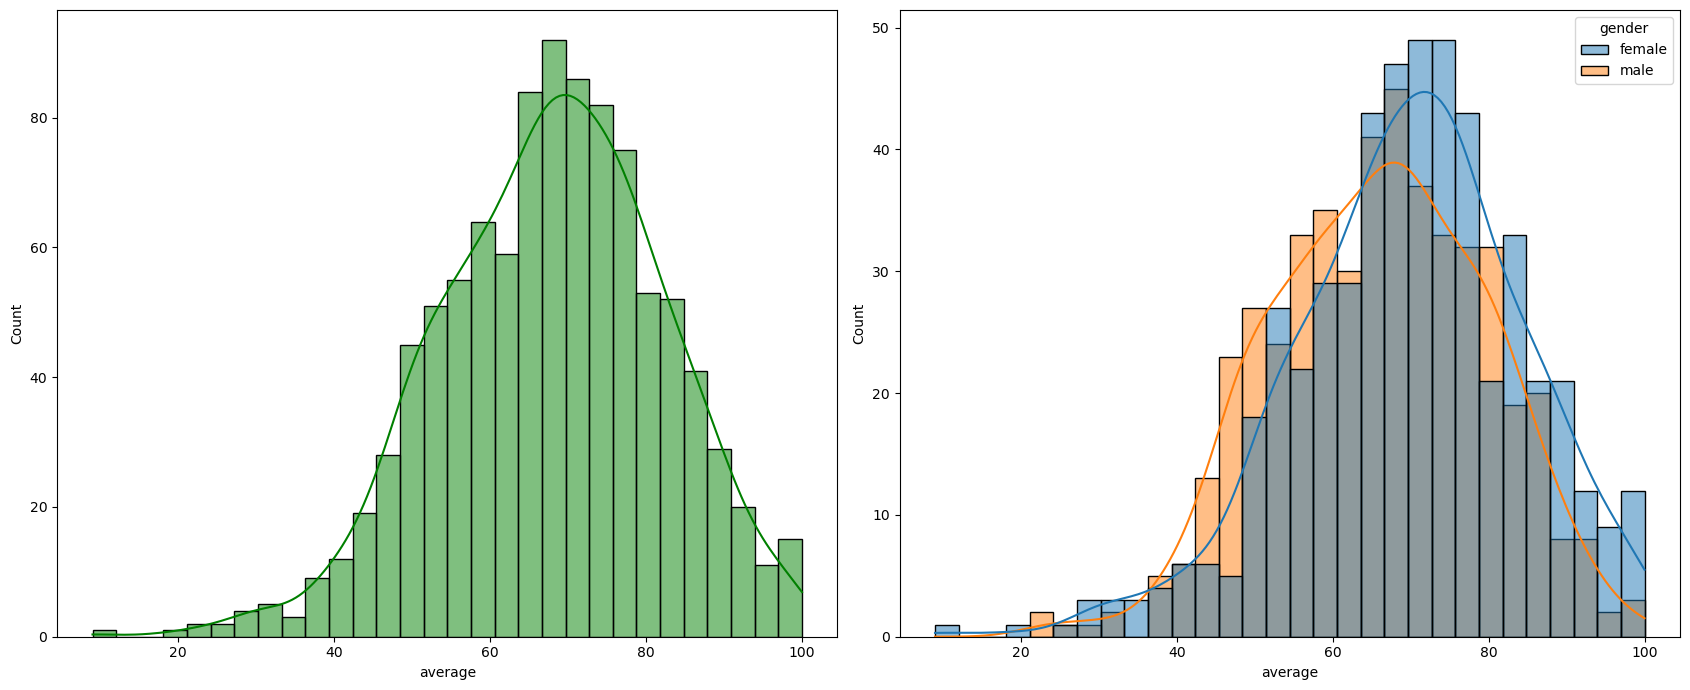

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(17, 7))
#plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g', ax=axs[0])
#plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender', ax=axs[1])
plt.tight_layout()
plt.show()

In [ ]:
#fig, axs = plt.subplots(1, 2, figsize=(17, 7))

#sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
#axs[0].set_title('Distribution of average (overall)')

#sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender',multiple='dodge', ax=axs[1])
#axs[1].set_title('Distribution of average by gender')

#plt.tight_layout()
#plt.show()



Distribution of Total Score

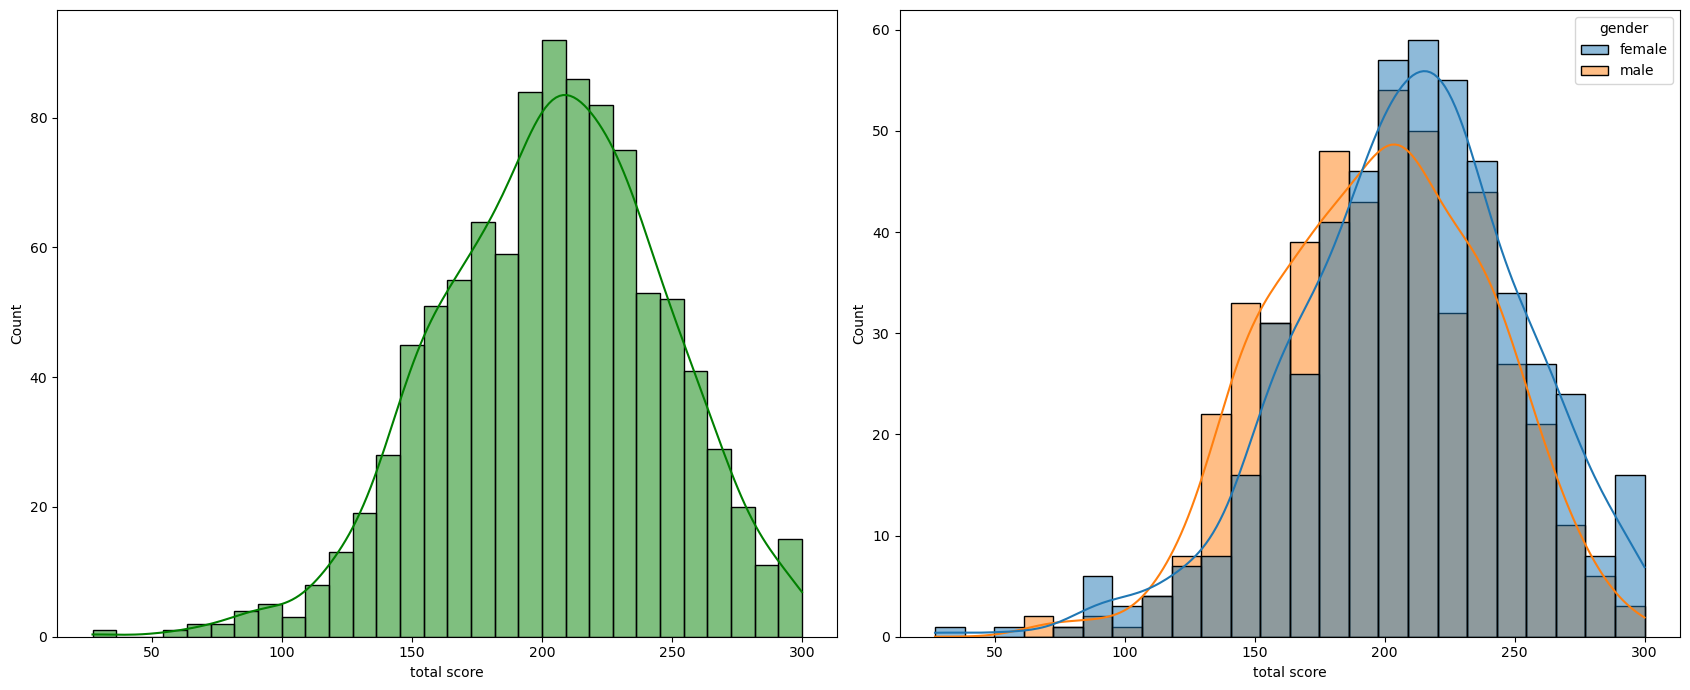

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(17, 7))
#plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g', ax = axs[0])
#plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender', ax = axs[1])
plt.tight_layout()
plt.show()

#####  Insights
- Female students tend to perform well than male students in average score and Total score as well.

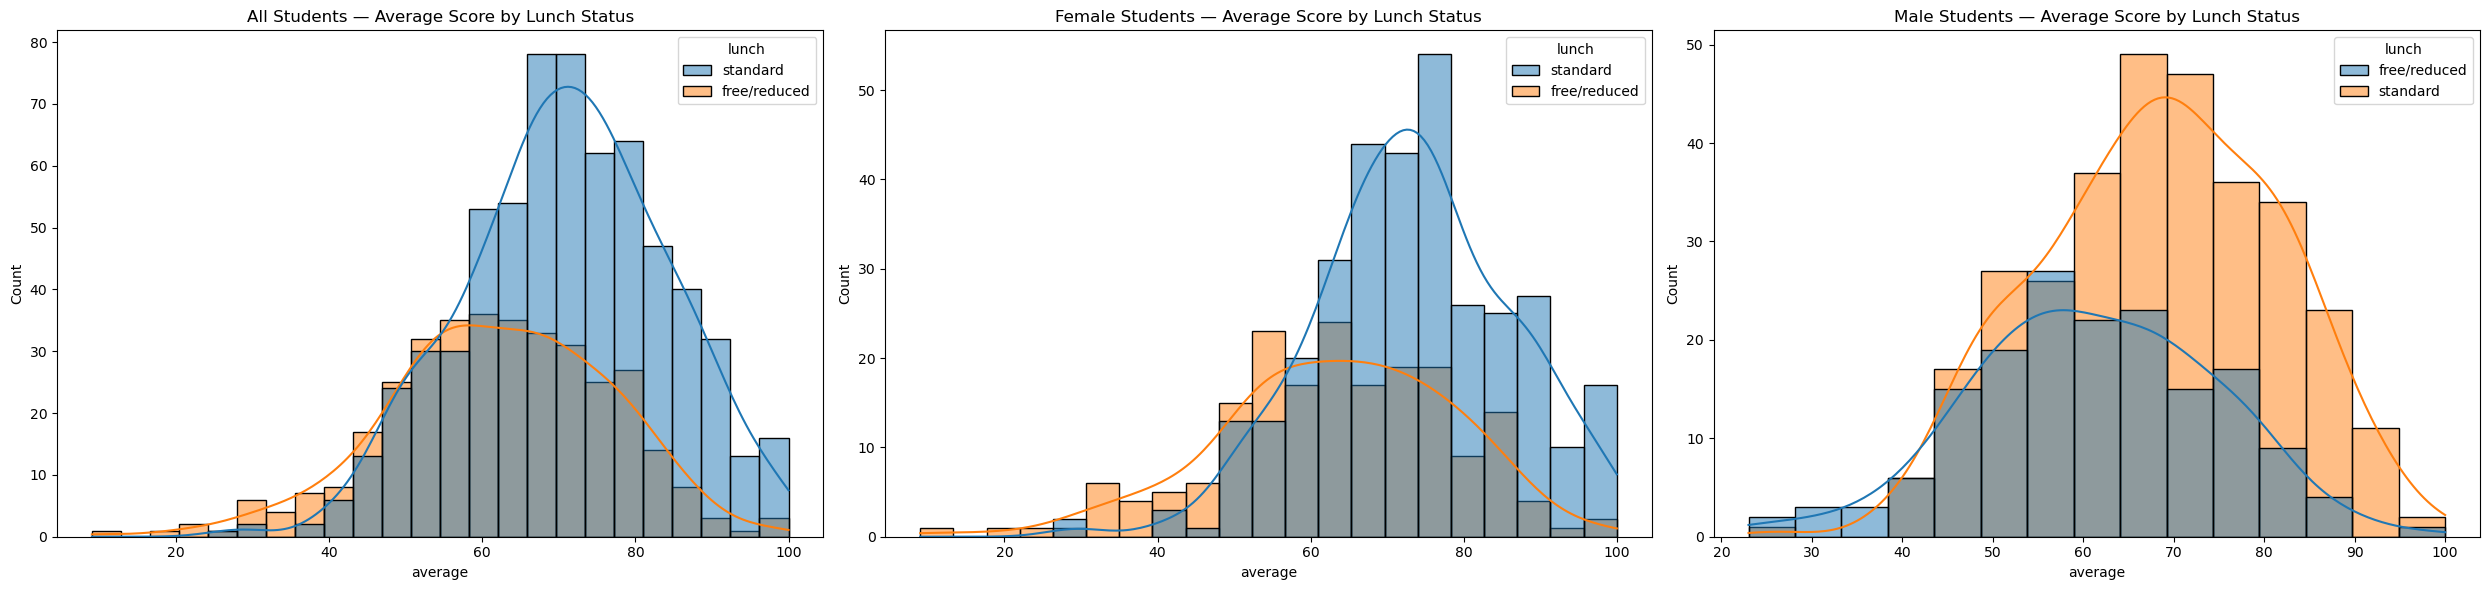

In [22]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
#plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch', ax = axs[0])
#plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch', ax = axs[1])
#plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch', ax = axs[2])
titles = [
    "All Students — Average Score by Lunch Status",
    "Female Students — Average Score by Lunch Status",
    "Male Students — Average Score by Lunch Status",
]

for ax, title in zip(axs, titles):
    ax.set_title(title)
plt.tight_layout()
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

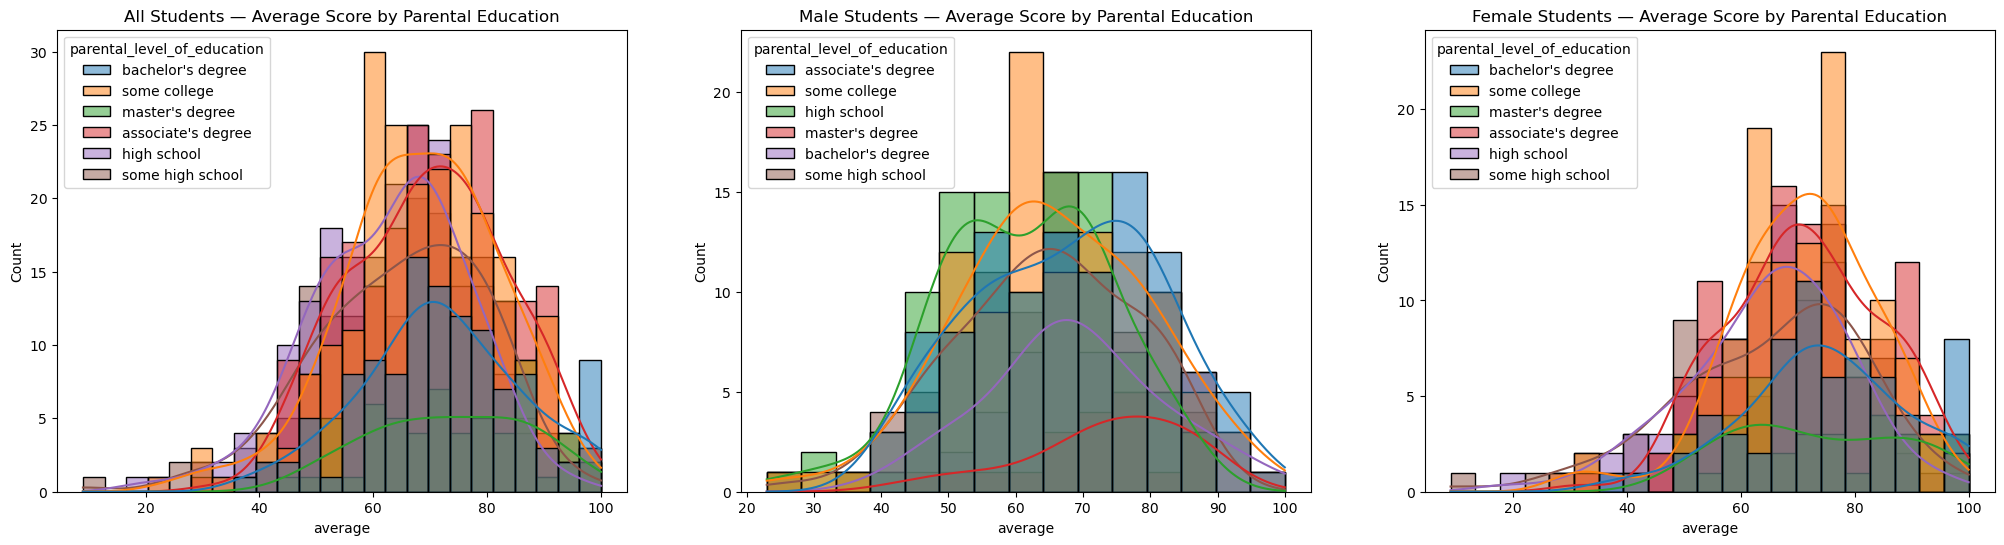

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.title("All Students — Average Score by Parental Education")

plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.title("Male Students — Average Score by Parental Education")

plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.title("Female Students — Average Score by Parental Education")

plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

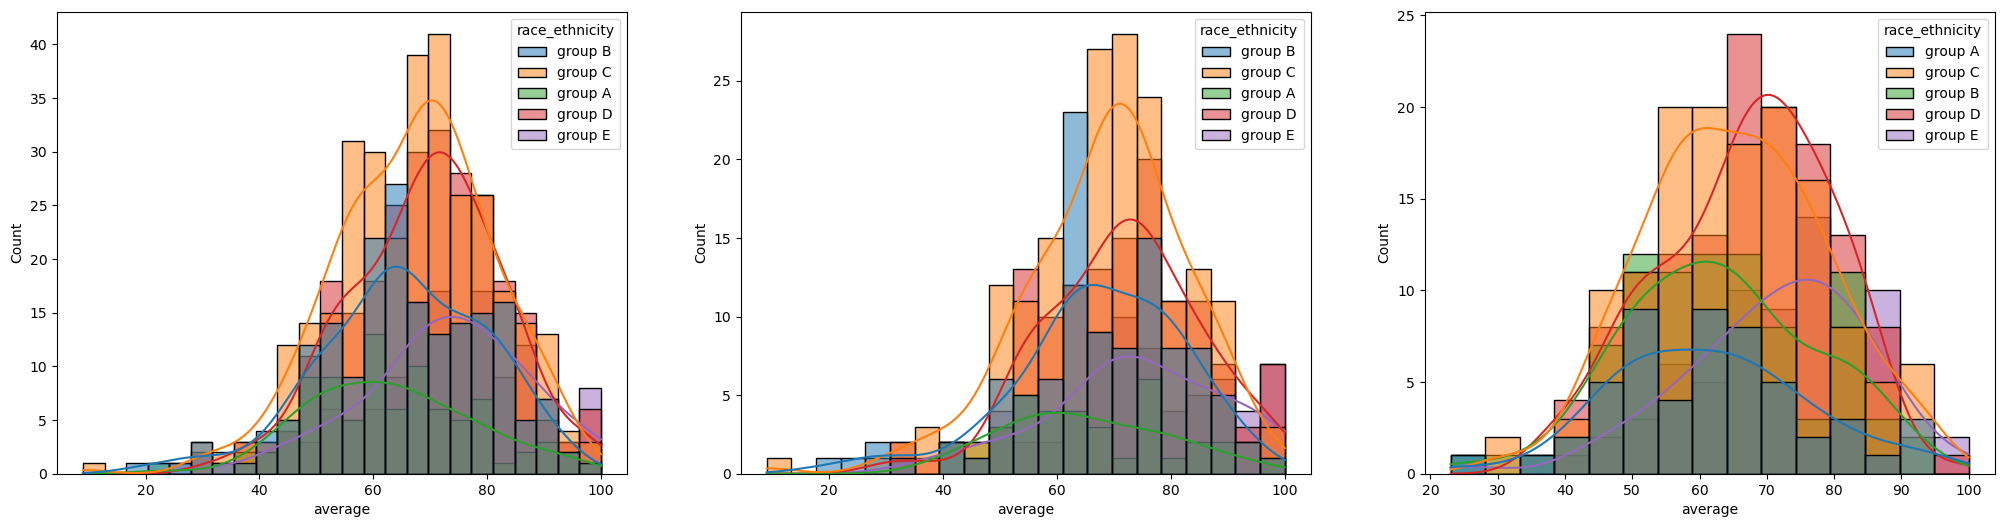

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

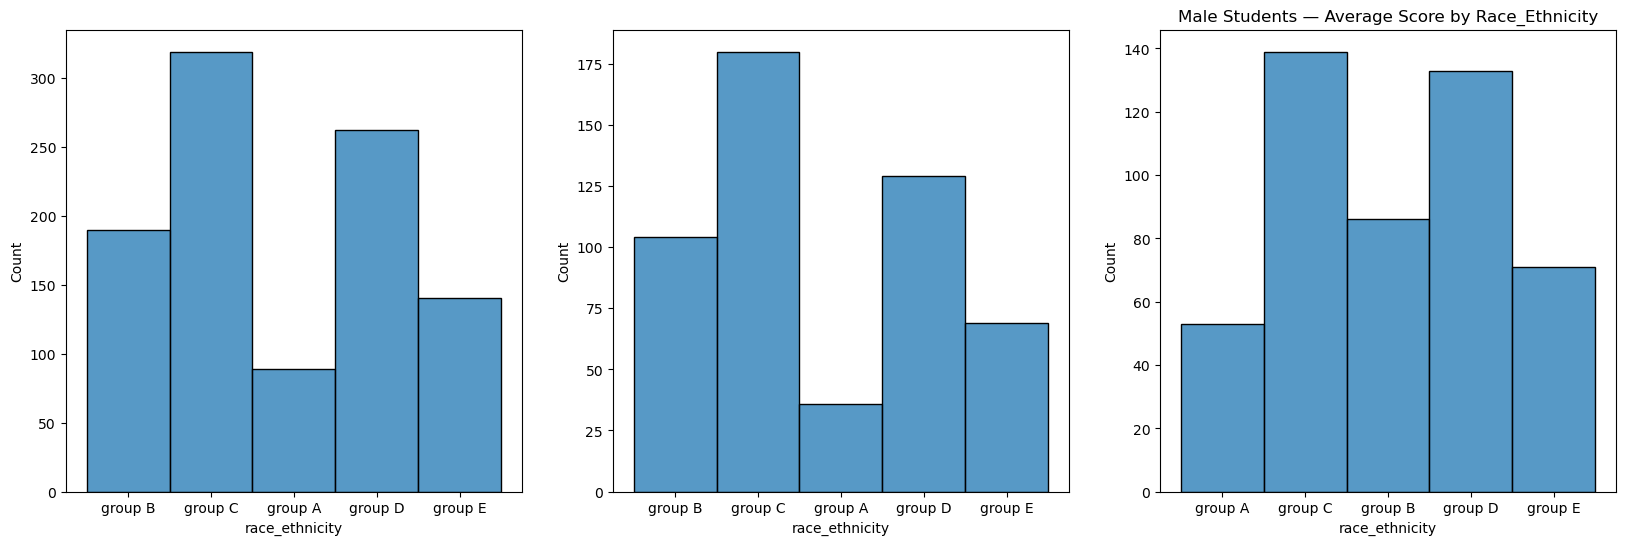

In [34]:
fig, axs = plt.subplots(1,3,figsize=(20,6))

ax =sns.histplot(data=df,x='race_ethnicity', ax = axs[0])
plt.title("All Students — Average Score by Race_Ethnicity")
ax =sns.histplot(data=df[df.gender=='female'],x='race_ethnicity', ax = axs[1])
plt.title("Female Students — Average Score by Race_Ethnicity")
ax =sns.histplot(data=df[df.gender=='male'],x='race_ethnicity', ax = axs[2])
plt.title("Male Students — Average Score by Race_Ethnicity")
plt.tight_layout
plt.show()

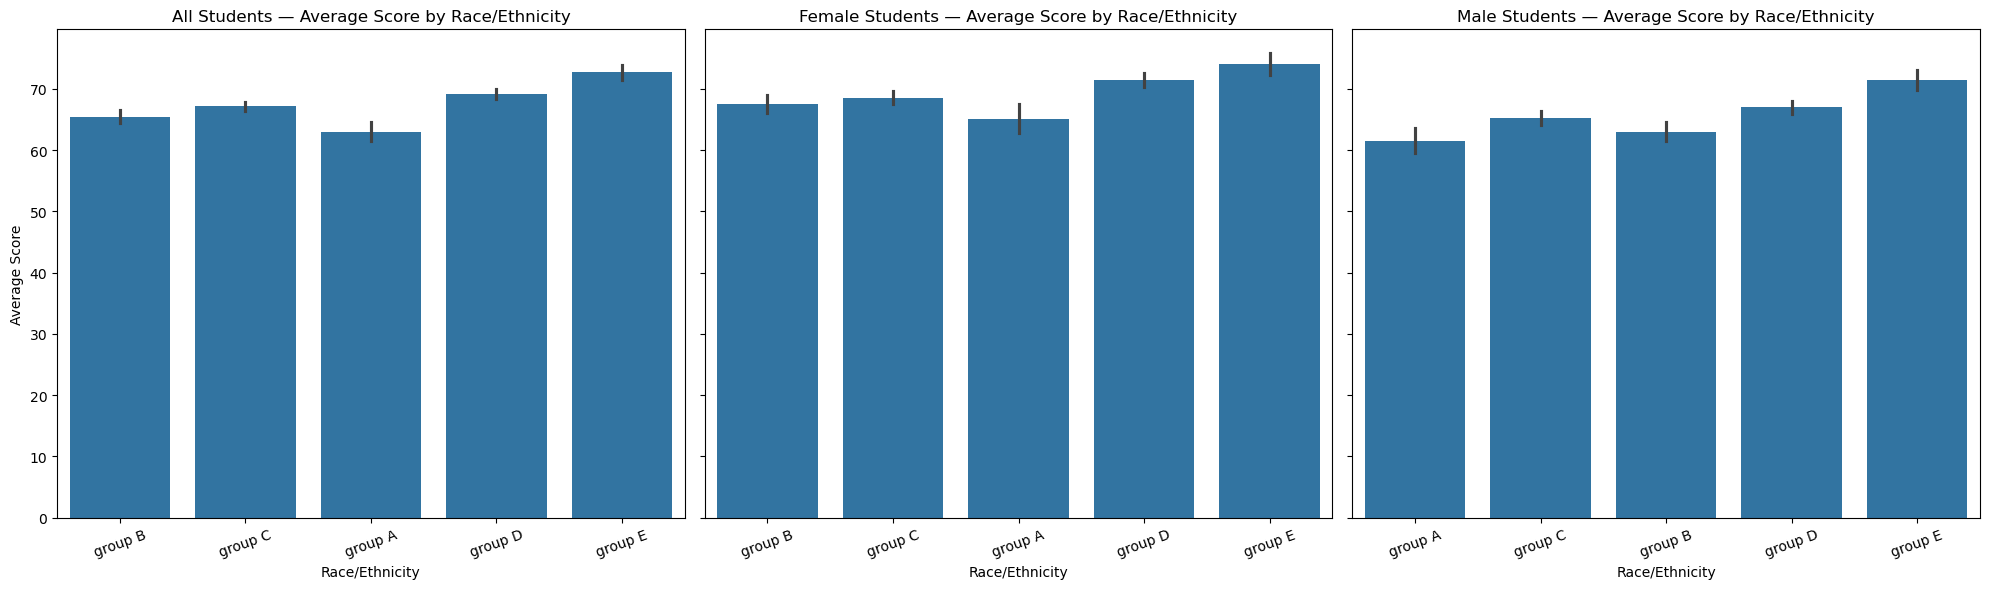

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# All students
sns.barplot(
    data=df,
    x='race_ethnicity', y='average',
    estimator=np.mean, errorbar='se',
    ax=axs[0]
)
axs[0].set_title("All Students — Average Score by Race/Ethnicity")
axs[0].set_xlabel("Race/Ethnicity")
axs[0].set_ylabel("Average Score")

# Female students
sns.barplot(
    data=df[df.gender == 'female'],
    x='race_ethnicity', y='average',
    estimator=np.mean, errorbar='se',
    ax=axs[1]
)
axs[1].set_title("Female Students — Average Score by Race/Ethnicity")
axs[1].set_xlabel("Race/Ethnicity")
axs[1].set_ylabel("")

# Male students
sns.barplot(
    data=df[df.gender == 'male'],
    x='race_ethnicity', y='average',
    estimator=np.mean, errorbar='se',
    ax=axs[2]
)
axs[2].set_title("Male Students — Average Score by Race/Ethnicity")
axs[2].set_xlabel("Race/Ethnicity")
axs[2].set_ylabel("")

for ax in axs:
    ax.tick_params(axis='x', labelrotation=20)

plt.tight_layout()
plt.show()


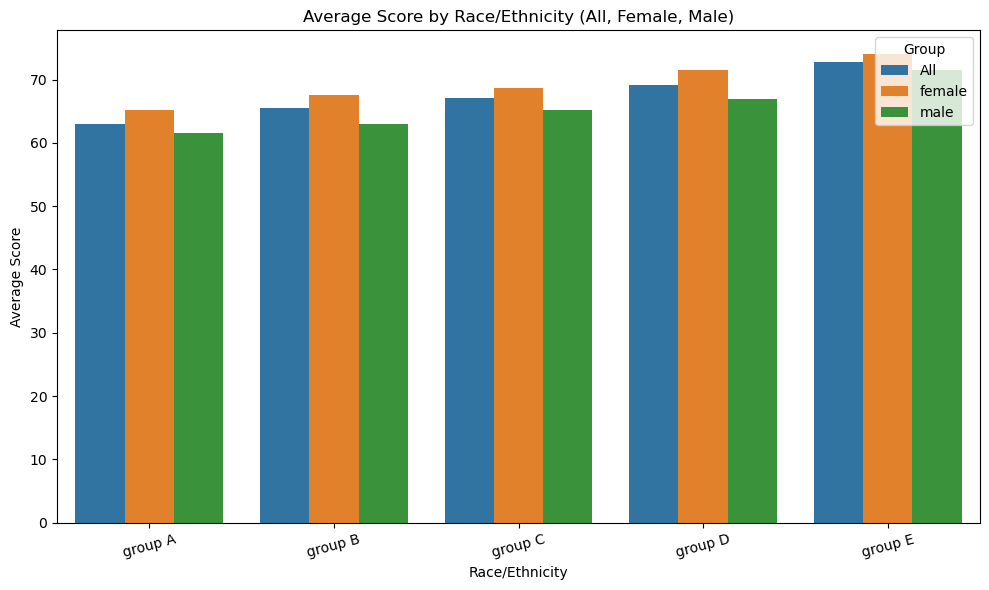

In [41]:
# 1) Build a tidy summary with an "All" row per race_ethnicity
by_gender = (
    df.groupby(['race_ethnicity','gender'], as_index=False)['average']
      .mean()
      .assign(group='By gender')   # just a placeholder, not used later
)

by_all = (
    df.groupby('race_ethnicity', as_index=False)['average']
      .mean()
      .assign(gender='All')
)

summary = pd.concat([by_all, by_gender], ignore_index=True)

# 2) Plot grouped bars
order = ['group A','group B','group C','group D','group E']   # enforce your preferred order
hue_order = ['All','female','male']

plt.figure(figsize=(10,6))
sns.barplot(
    data=summary,
    x='race_ethnicity', y='average',
    hue='gender',
    order=order,
    hue_order=hue_order,
    estimator=np.mean, errorbar='se'
)

plt.title("Average Score by Race/Ethnicity (All, Female, Male)")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Average Score")
plt.legend(title="Group")

# Optional: rotate x labels a bit
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

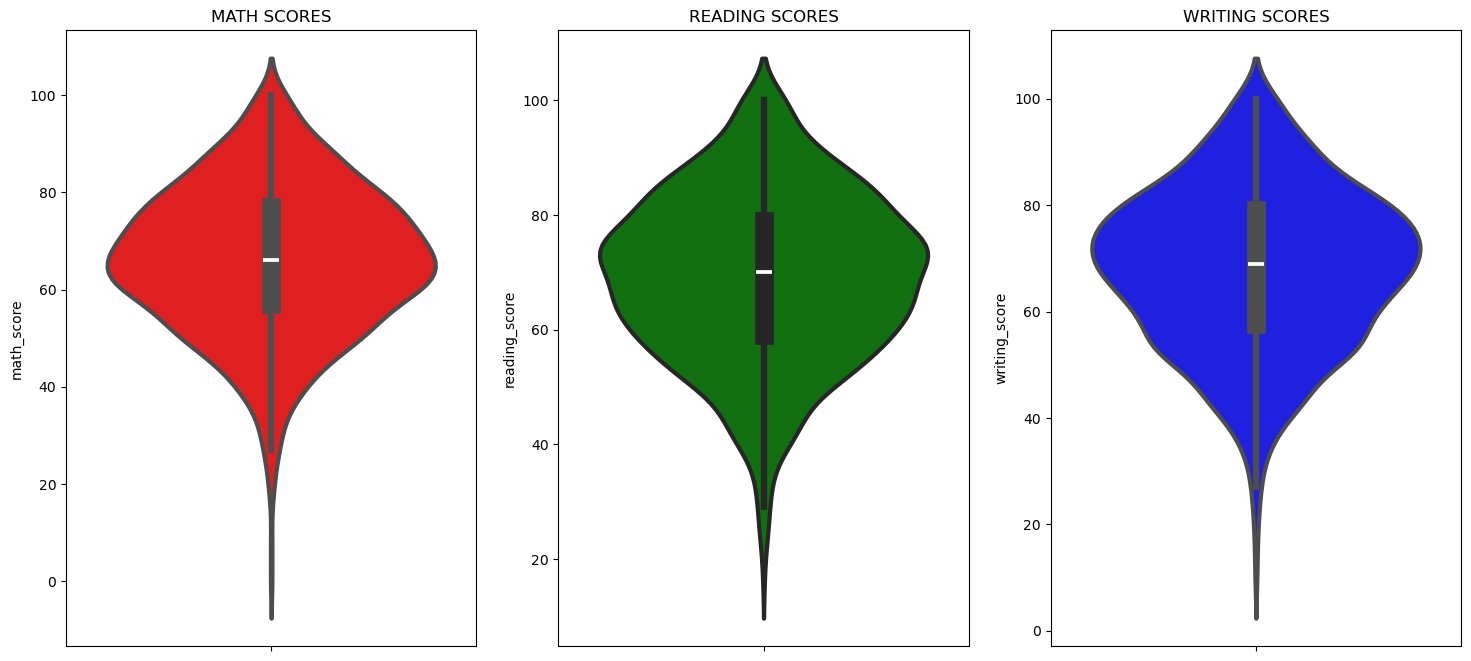

In [48]:

plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

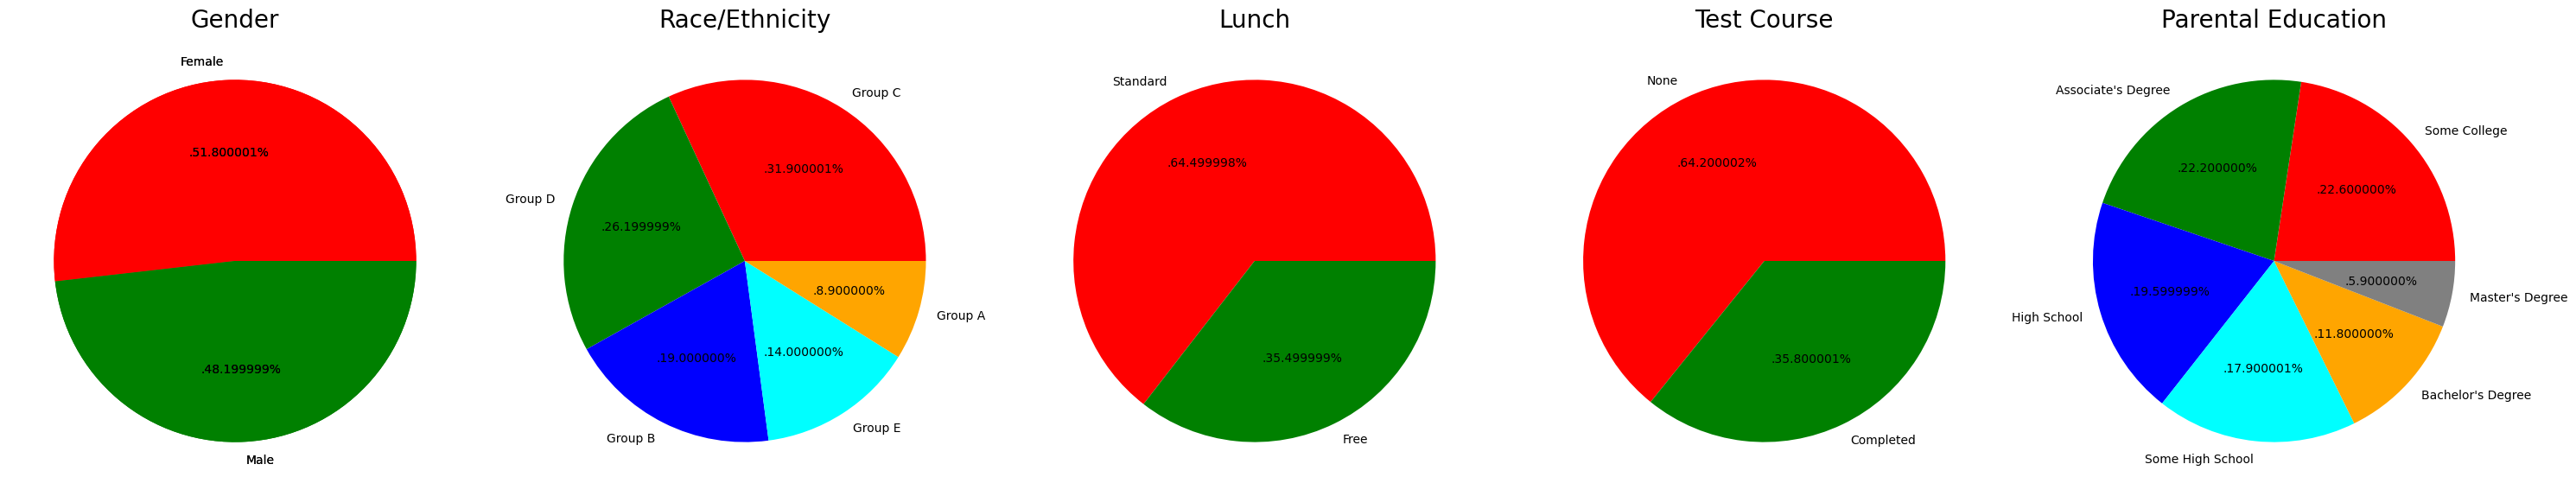

In [51]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

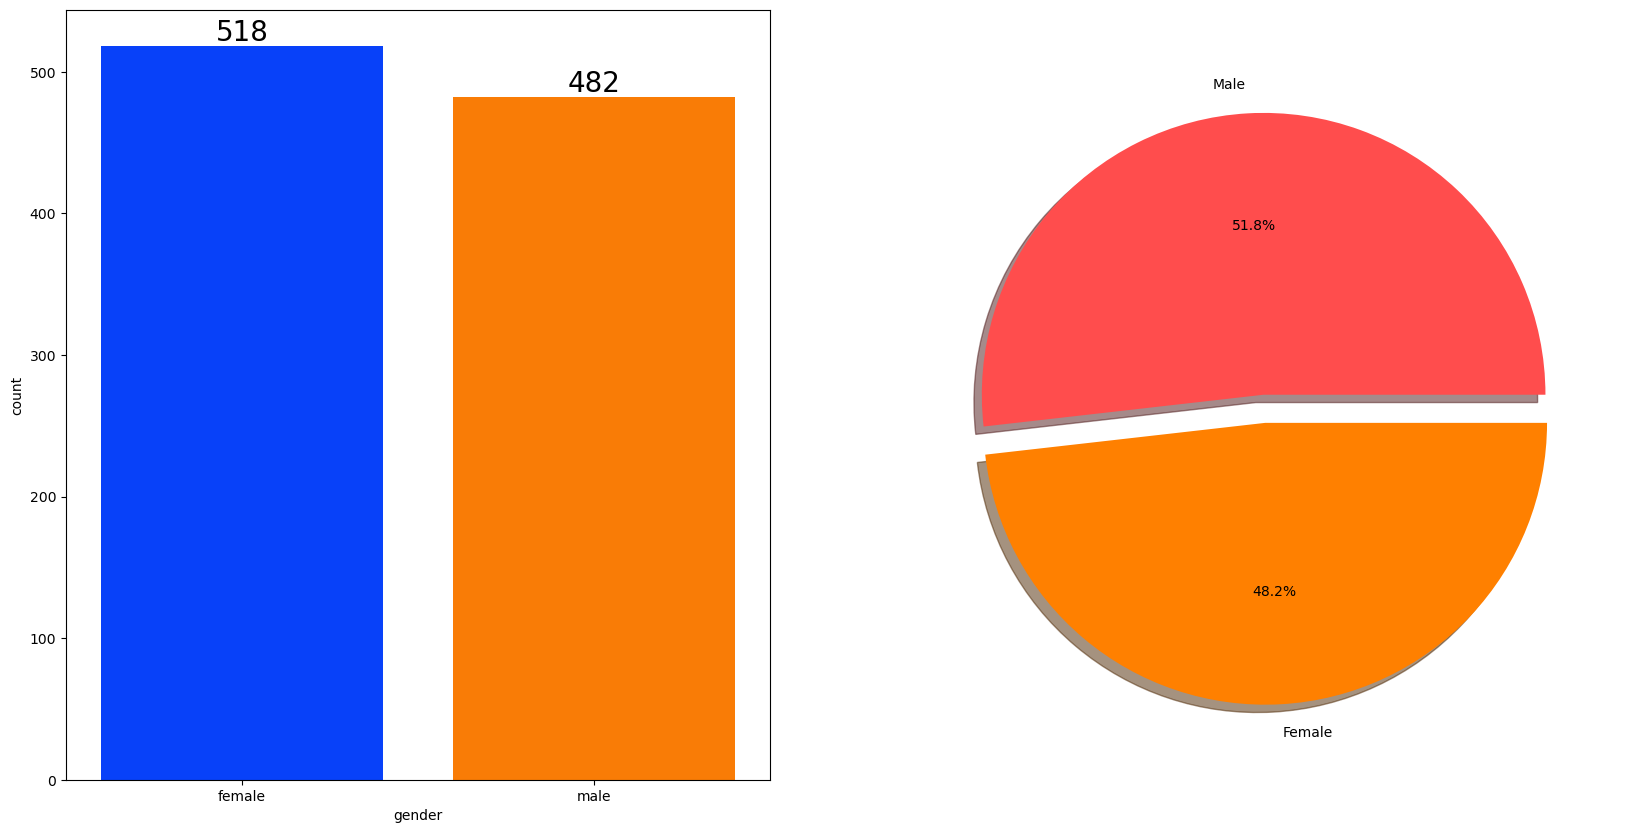

In [56]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (52%) and male students are 482 (48%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [59]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837481


<Figure size 1000x800 with 0 Axes>

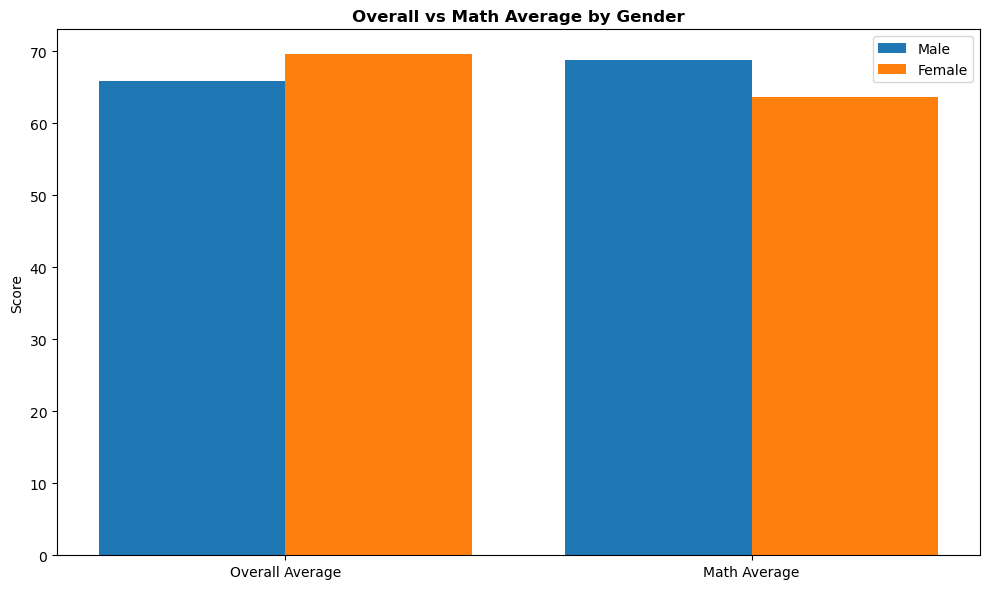

In [61]:
# compute means only for what you need
gender_group = (df.groupby('gender')[['average','math_score']].mean())

X = ['Overall Average', 'Math Average']

female_scores = gender_group.loc['female', ['average','math_score']].to_numpy()
male_scores   = gender_group.loc['male',   ['average','math_score']].to_numpy()

X_axis = np.arange(len(X))
width = 0.4

plt.figure(figsize=(10, 6))
plt.bar(X_axis - width/2, male_scores,   width, label='Male')
plt.bar(X_axis + width/2, female_scores, width, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Score")
plt.title("Overall vs Math Average by Gender", fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

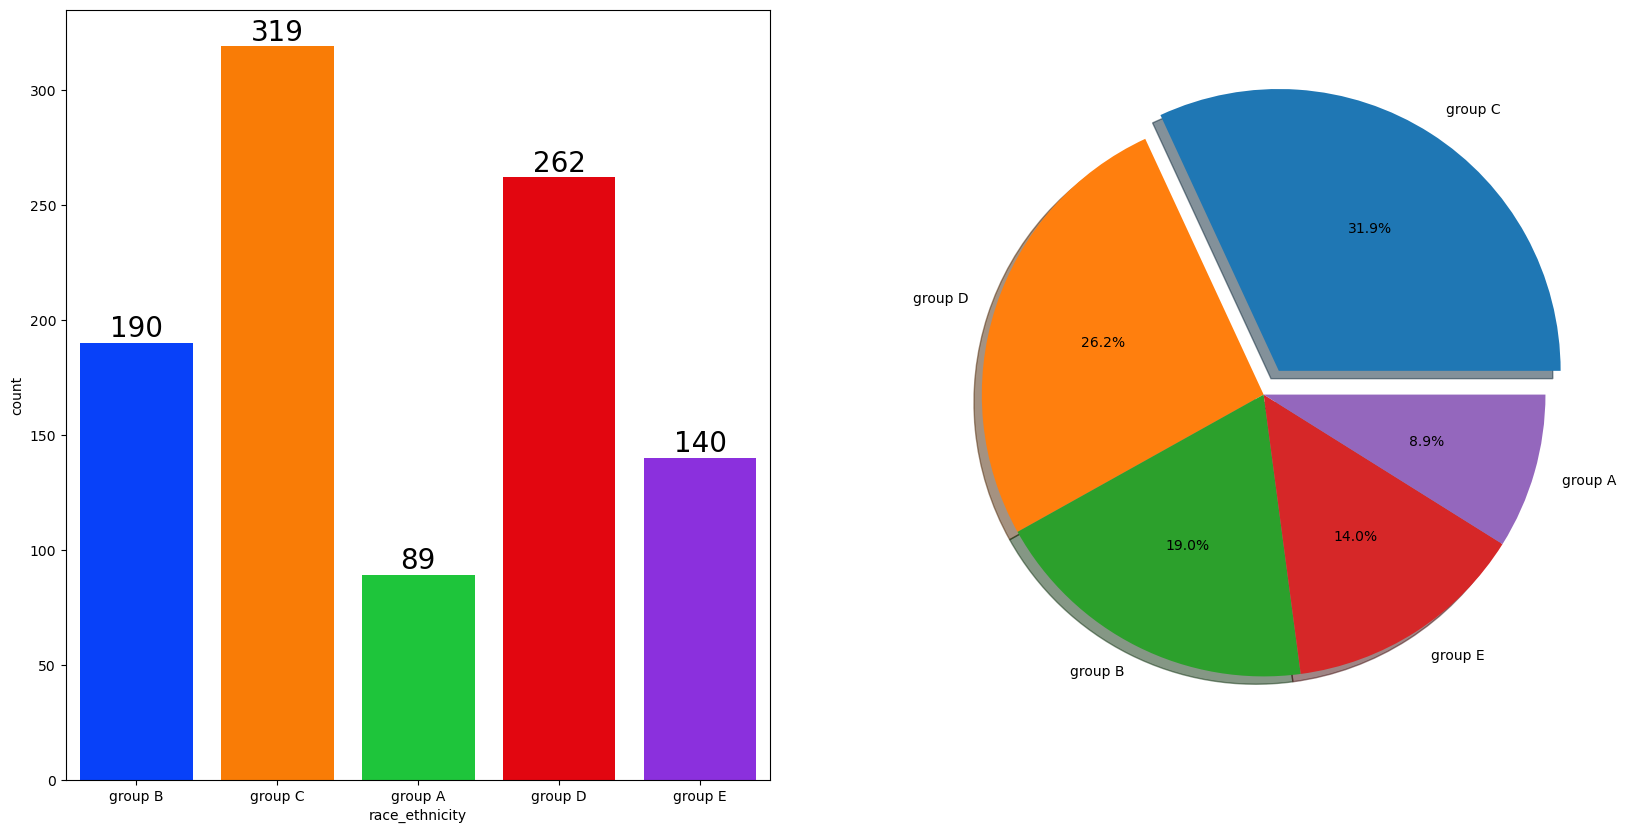

In [65]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

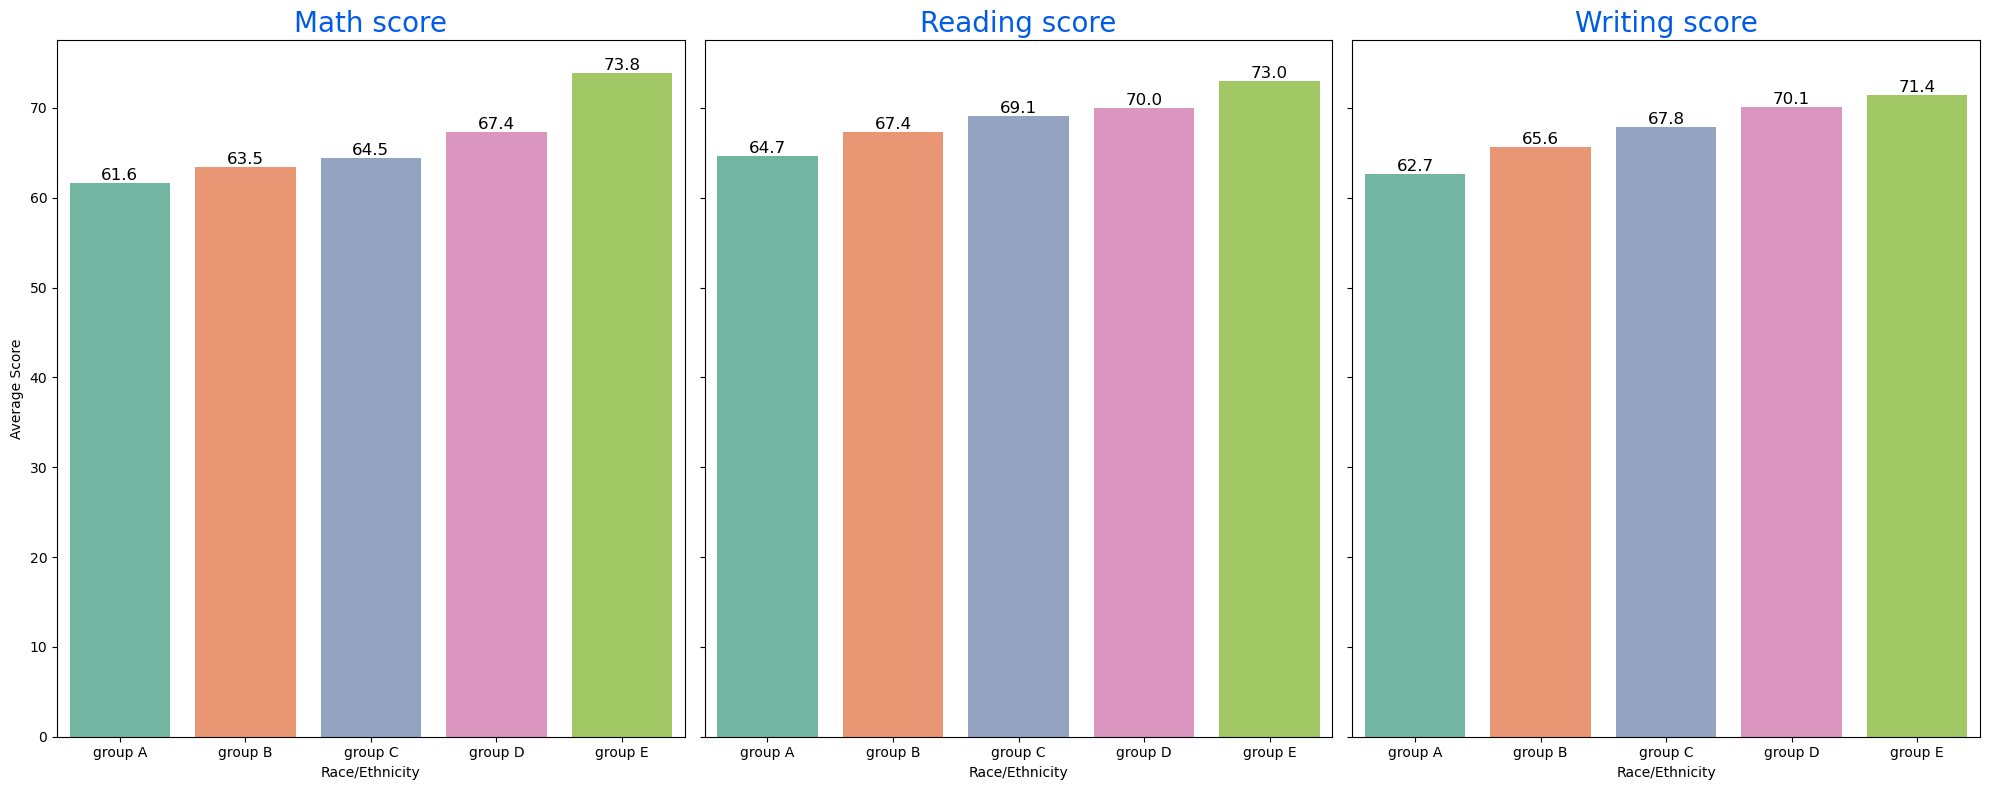

In [69]:
order = ['group A','group B','group C','group D','group E']  # keep x consistent

# precompute means once
means = (df.groupby('race_ethnicity')[['math_score','reading_score','writing_score']]
           .mean()
           .reindex(order))

fig, ax = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

sns.barplot(x=means.index, y=means['math_score'].values,    ax=ax[0], errorbar=None, palette='Set2')
ax[0].set_title('Math score', color='#005ce6', size=20)

sns.barplot(x=means.index, y=means['reading_score'].values, ax=ax[1], errorbar=None, palette='Set2')
ax[1].set_title('Reading score', color='#005ce6', size=20)

sns.barplot(x=means.index, y=means['writing_score'].values, ax=ax[2], errorbar=None, palette='Set2')
ax[2].set_title('Writing score', color='#005ce6', size=20)

# add labels on bars
for a in ax:
    for cont in a.containers:
        a.bar_label(cont, color='black', size=12, fmt='%.1f')
    a.set_xlabel('Race/Ethnicity')
    a.set_ylabel('Average Score')

plt.tight_layout()
plt.show()

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

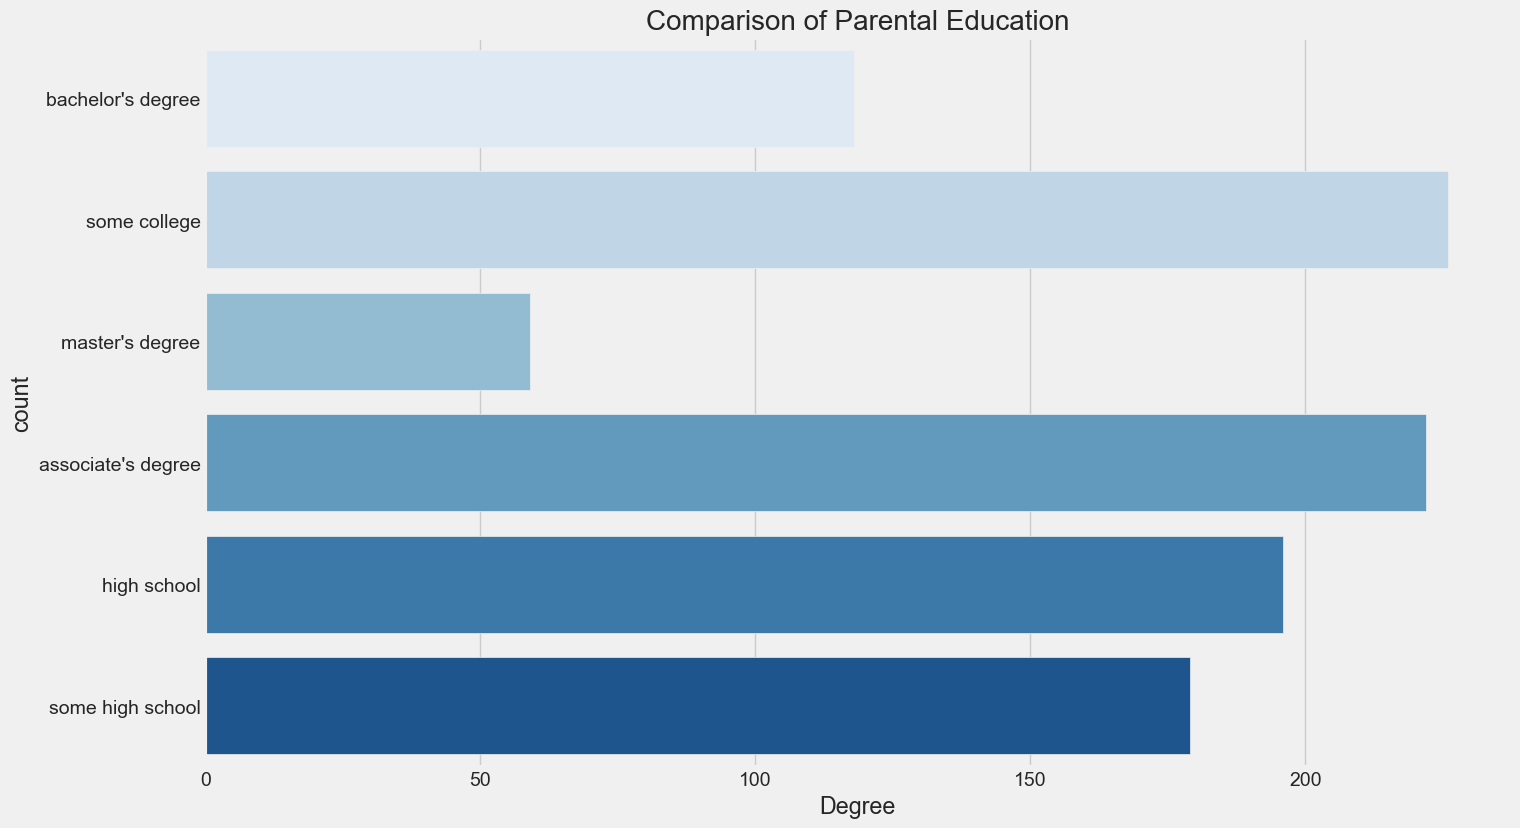

In [105]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

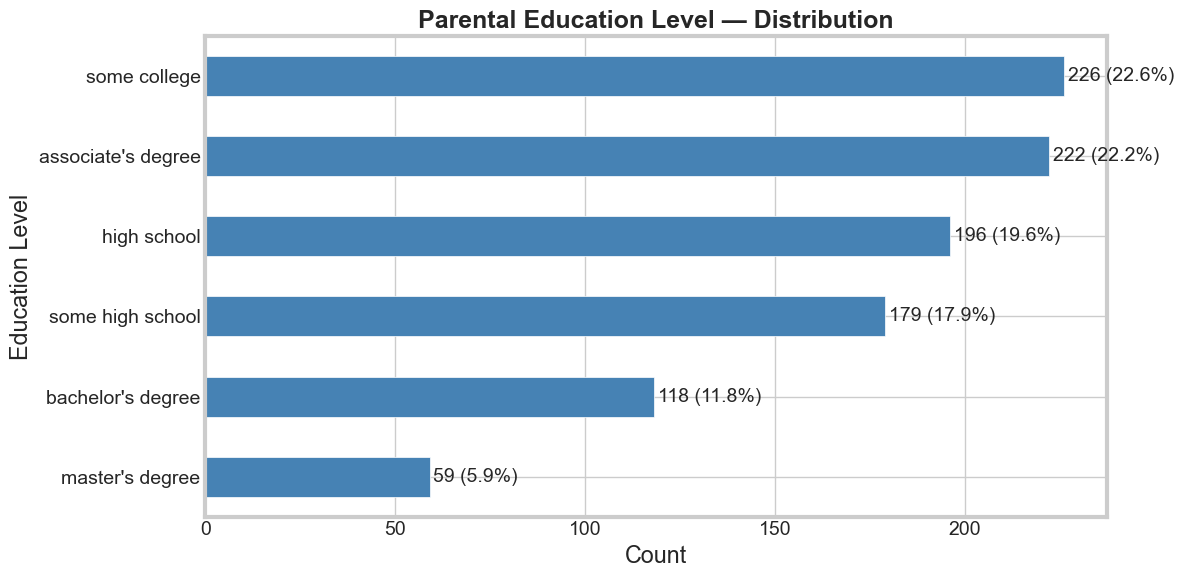

In [94]:
counts = df['parental_level_of_education'].value_counts().sort_values()  # ascending for a nice bottom-up barh

plt.figure(figsize=(12, 6))
ax = counts.plot(kind='barh', color='steelblue')
ax.set_title('Parental Education Level — Distribution', fontsize=18, fontweight='bold')
ax.set_xlabel('Count'); ax.set_ylabel('Education Level')

# Add labels at the end of bars
for i, v in enumerate(counts.values):
    ax.text(v + 1, i, f"{v} ({v/len(df):.1%})", va='center')

plt.tight_layout()
plt.show()


#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

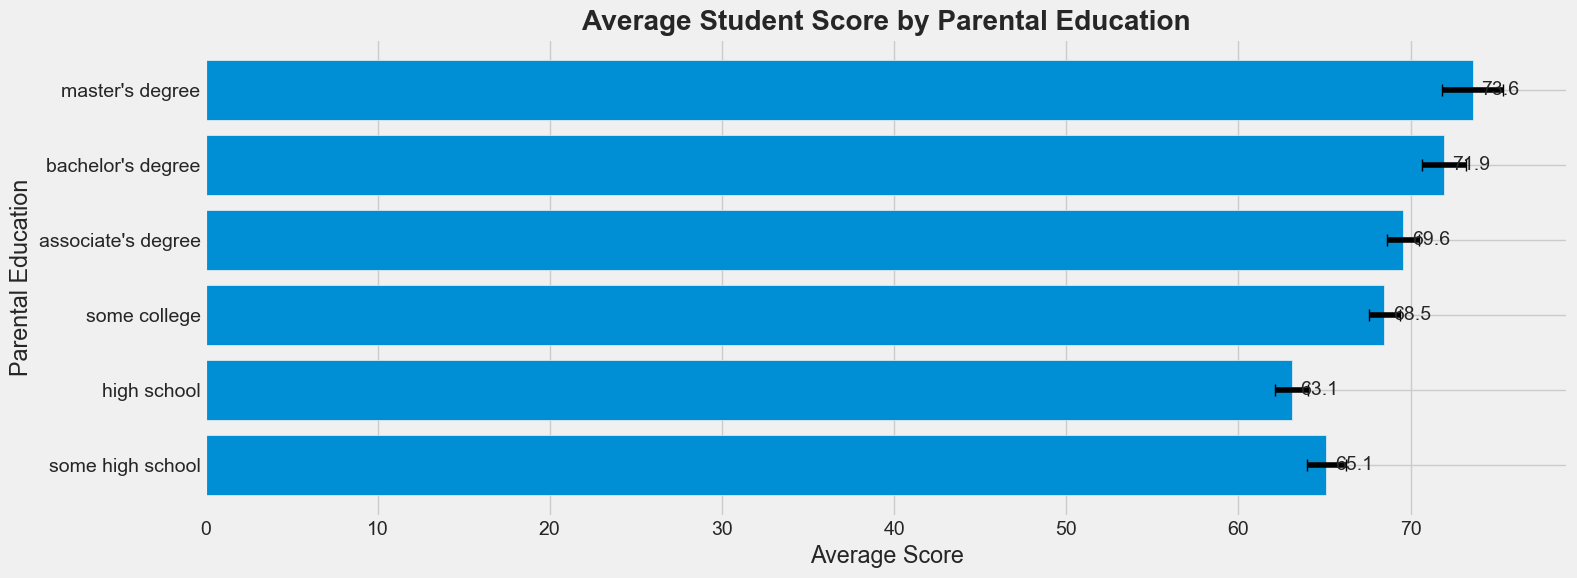

In [107]:
plt.close('all')
# logical order for the x-axis
order = [
    'some high school','high school','some college',
    "associate's degree","bachelor's degree","master's degree"
]

g = df.groupby('parental_level_of_education')['average']
means = g.mean().reindex(order)
ses   = g.sem().reindex(order)  # standard error = sd/sqrt(n)

plt.figure(figsize=(16, 6))
ax = plt.barh(means.index, means.values, xerr=ses.values, capsize=4)
plt.title("Average Student Score by Parental Education", fontweight='bold')
plt.xlabel("Average Score"); plt.ylabel("Parental Education")

# optional: annotate values
for y, v in enumerate(means.values):
    plt.text(v + 0.5, y, f"{v:.1f}", va='center')

plt.tight_layout()
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

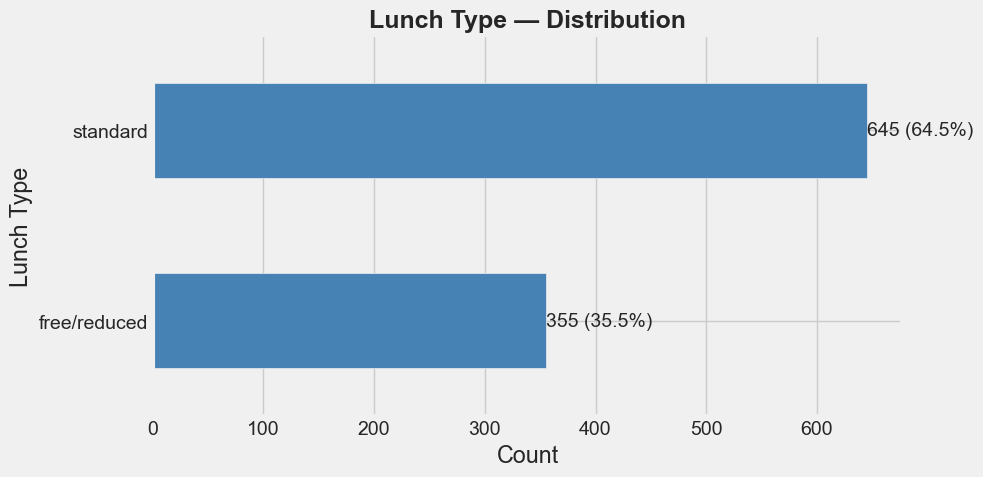

In [113]:
counts = df['lunch'].value_counts().sort_values()  # small→large
fig, ax = plt.subplots(figsize=(10, 5))
counts.plot(kind='barh', color='steelblue', ax=ax)
ax.set_title('Lunch Type — Distribution', fontsize=18, fontweight='bold')
ax.set_xlabel('Count'); ax.set_ylabel('Lunch Type')

total = len(df)
for i, v in enumerate(counts.values):
    ax.text(v + 0.5, i, f"{int(v)} ({v/total:.1%})", va='center')

plt.tight_layout()
plt.show()


#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

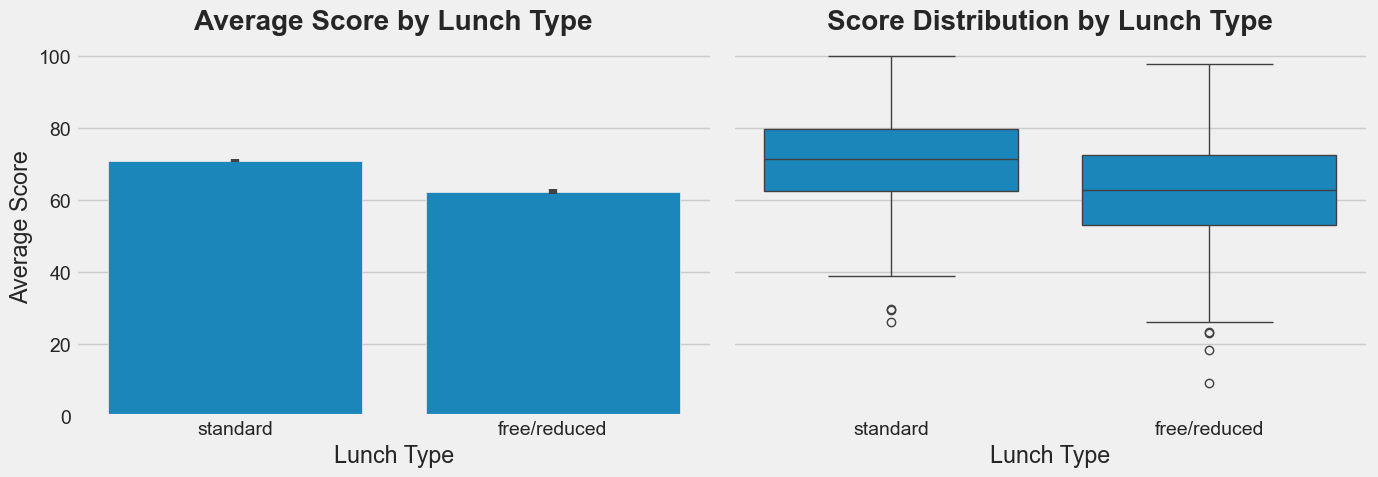

Means: standard = 70.84, free/reduced = 62.20
Welch t-test p-value = 1.583e-19  (p<0.05 ⇒ significant difference)
Cohen's d = 0.63  (~0.2 small, ~0.5 medium, ~0.8 large)


In [116]:
from scipy.stats import ttest_ind
order = ['standard', 'free/reduced']  # adjust if your categories differ

fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Mean ± SE by lunch (answers the question)
sns.barplot(data=df, x='lunch', y='average', order=order,
            estimator=np.mean, errorbar='se', ax=ax[0])
ax[0].set_title('Average Score by Lunch Type', fontweight='bold')
ax[0].set_xlabel('Lunch Type'); ax[0].set_ylabel('Average Score')

# Distribution view (checks for skew/outliers)
sns.boxplot(data=df, x='lunch', y='average', order=order, ax=ax[1])
ax[1].set_title('Score Distribution by Lunch Type', fontweight='bold')
ax[1].set_xlabel('Lunch Type'); ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Statistical test (Welch’s t-test)
a = df.loc[df.lunch == order[0], 'average'].dropna()
b = df.loc[df.lunch == order[1], 'average'].dropna()
t, p = ttest_ind(a, b, equal_var=False)

# Effect size (Cohen's d)
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    sx2, sy2 = x.var(ddof=1), y.var(ddof=1)
    sp = np.sqrt(((nx-1)*sx2 + (ny-1)*sy2) / (nx+ny-2))
    return (x.mean() - y.mean()) / sp

d = cohens_d(a, b)

print(f"Means: {order[0]} = {a.mean():.2f}, {order[1]} = {b.mean():.2f}")
print(f"Welch t-test p-value = {p:.4g}  (p<0.05 ⇒ significant difference)")
print(f"Cohen's d = {d:.2f}  (~0.2 small, ~0.5 medium, ~0.8 large)")

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

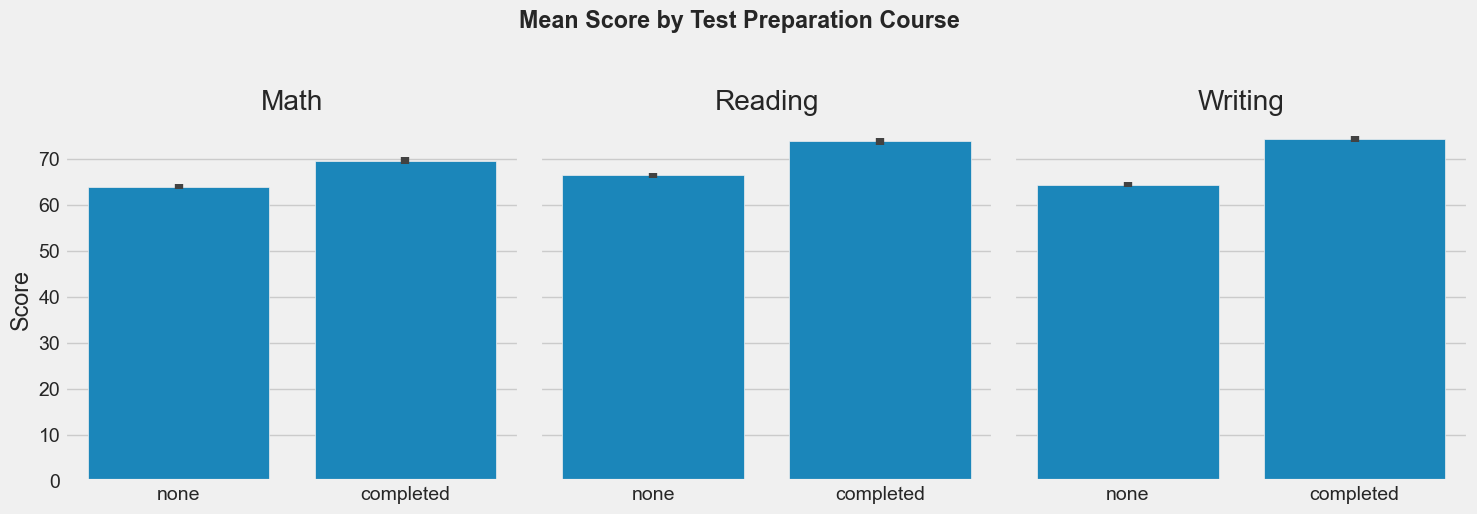

In [119]:
order = ['none','completed']  # adjust if your labels differ

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.barplot(data=df, x='test_preparation_course', y='math_score',
            order=order, estimator=np.mean, errorbar='se', ax=axs[0])
axs[0].set_title('Math');   axs[0].set_xlabel(''); axs[0].set_ylabel('Score')

sns.barplot(data=df, x='test_preparation_course', y='reading_score',
            order=order, estimator=np.mean, errorbar='se', ax=axs[1])
axs[1].set_title('Reading'); axs[1].set_xlabel(''); axs[1].set_ylabel('')

sns.barplot(data=df, x='test_preparation_course', y='writing_score',
            order=order, estimator=np.mean, errorbar='se', ax=axs[2])
axs[2].set_title('Writing'); axs[2].set_xlabel(''); axs[2].set_ylabel('')

fig.suptitle('Mean Score by Test Preparation Course', y=1.03, fontweight='bold')
plt.tight_layout()
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

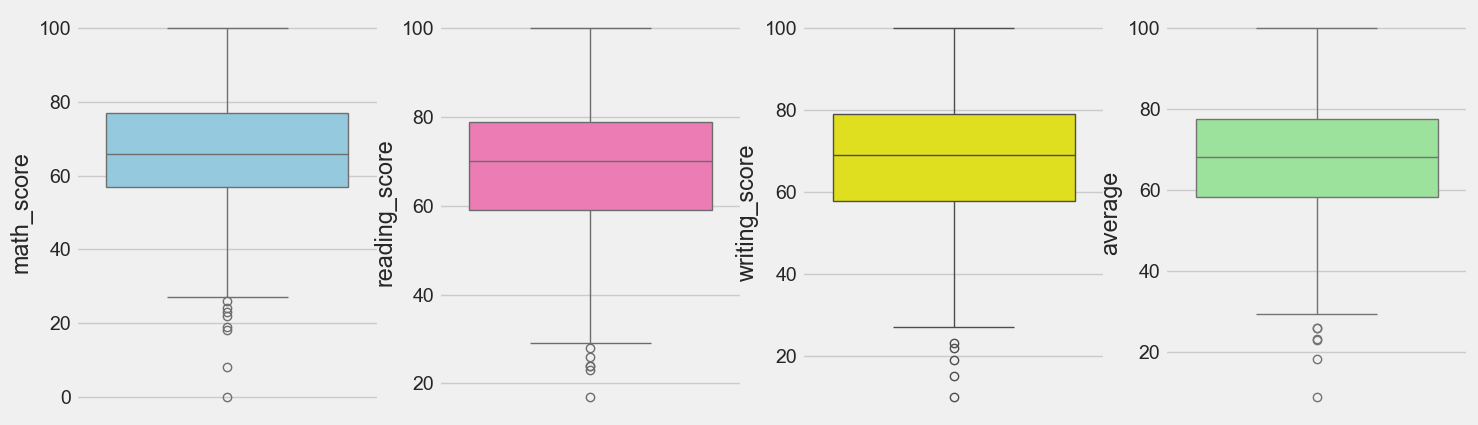

In [122]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

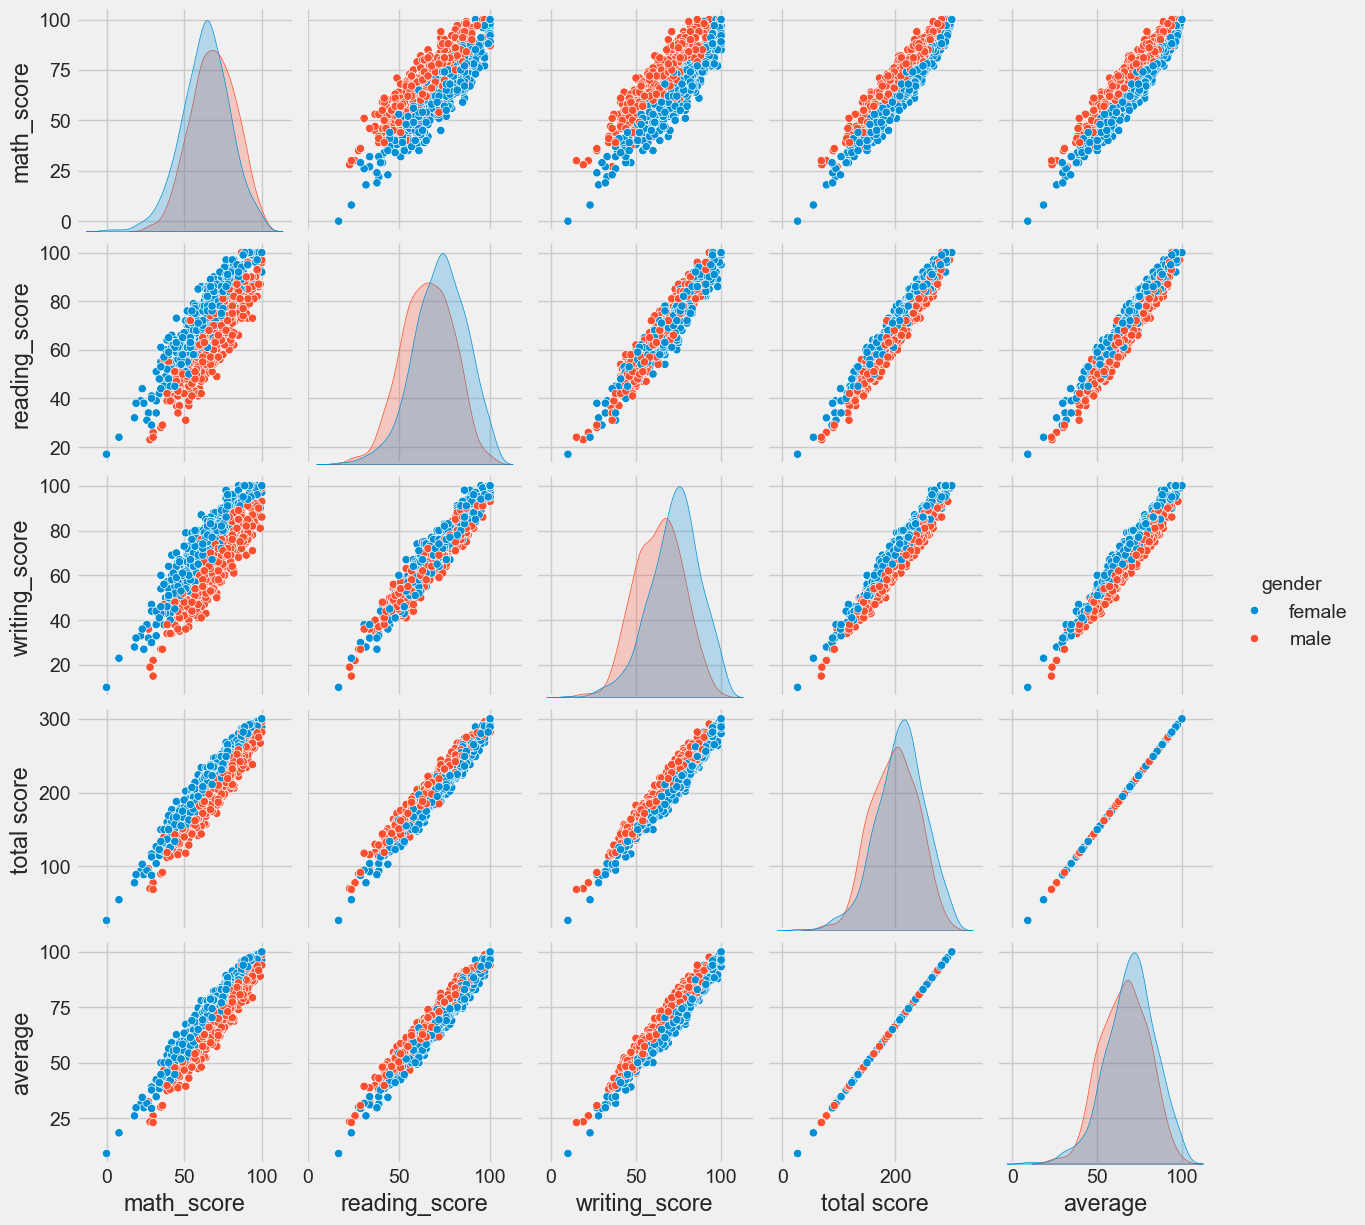

In [123]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.